# Задание 1

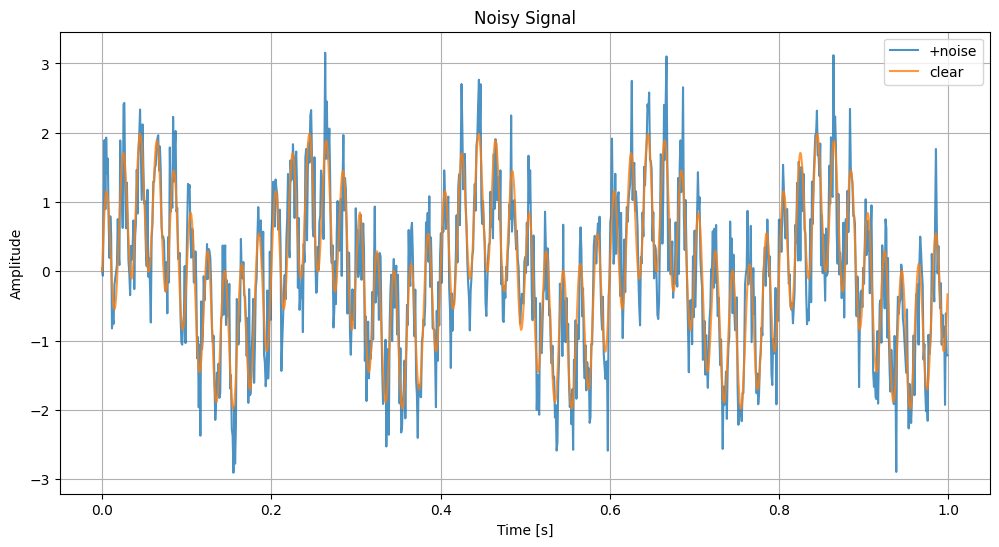

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def gen_data(pN, freq, amp, noise_amp):
    # Generate the clean signal
    fs = 2**int(pow_N)  # Sampling frequency
    t = np.arange(0, 1.0, 1/fs)  # Time vector
    signal = sum(a * np.sin(2 * np.pi * f * t) for a, f in zip(amplitude, freq))
    # Add noise to the signal
    return t, signal, signal + noise_amp * np.random.normal(size=t.shape)

# Parameters
pow_N = 10 #power of frequency (will be ceiled)
frequencies = [5, 50]  # Frequencies of the sine waves
amplitude = [1, 1]  # Amplitude of the sine waves
noise_amplitude = 0.5  # Amplitude of the noise

t, signal, noisy_signal = gen_data(pow_N, frequencies, amplitude, noise_amplitude)

# Plot the noisy signal
plt.figure(figsize=(12, 6))
plt.plot(t, noisy_signal, alpha=0.8, label='+noise')
plt.plot(t, signal, alpha=0.8, label='clear')
plt.title('Noisy Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()
plt.show()


In [133]:
def fft(x):
    N = len(x)
    if N <= 1:
        return np.array([x])
    even = fft(x[0::2])
    odd = fft(x[1::2])
    N2 = min(len(even), len(odd))
    T = [np.exp(-2j * np.pi * k / N) * odd[k] for k in range(N2)]
    return np.array([even[k] + T[k] for k in range(N2)] + [even[k] - T[k] for k in range(N2)])

def ifft(X):
    N = len(X)
    # Prepare an array for the output
    res = np.zeros(N, dtype=complex)
    
    for n in range(N):
        # Compute the inverse FFT formula
        for k in range(N):
            res[n] += X[k] * np.exp(2j * np.pi * k * n / N)
        res[n] /= N  # Normalize by dividing by N
    
    return res


def algorithm(x, mag_threshold):
    # Perform FFT
    
    fft_signal = fft(noisy_signal[:np.power(2, int(np.log2(len(noisy_signal))))])
    frequencies = np.fft.fftfreq(len(fft_signal), d=1/len(fft_signal))

    # Plot the FFT result
    plt.figure(figsize=(12, 6))
    plt.plot(frequencies[:len(frequencies)//2], np.abs(fft_signal)[:len(frequencies)//2])
    plt.title('FFT of Noisy Signal')
    plt.xlabel('Frequency [Hz]')
    plt.ylabel('Magnitude')
    plt.grid()
    plt.show()

    # Create a band-pass filter mask
    filter_mask = np.abs(fft_signal) > mag_threshold
    # Apply the filter mask to the FFT result
    filtered_fft_signal = np.zeros_like(fft_signal)
    noise_fft_signal = fft_signal.copy()
    filtered_fft_signal[filter_mask] = fft_signal[filter_mask]
    noise_fft_signal[filter_mask] = 0

    # Plot the filtered FFT result
    plt.figure(figsize=(12, 6))
    plt.plot(frequencies[:len(frequencies)//2], np.abs(filtered_fft_signal)[:len(frequencies)//2])
    plt.title('Filtered FFT Signal')
    plt.xlabel('Frequency [Hz]')
    plt.ylabel('Magnitude')
    plt.grid()
    plt.show()

    # Perform inverse FFT to get the denoised signal
    denoised_signal = ifft(filtered_fft_signal).real
    noise_signal = ifft(noise_fft_signal).real

    return denoised_signal.real, noise_signal

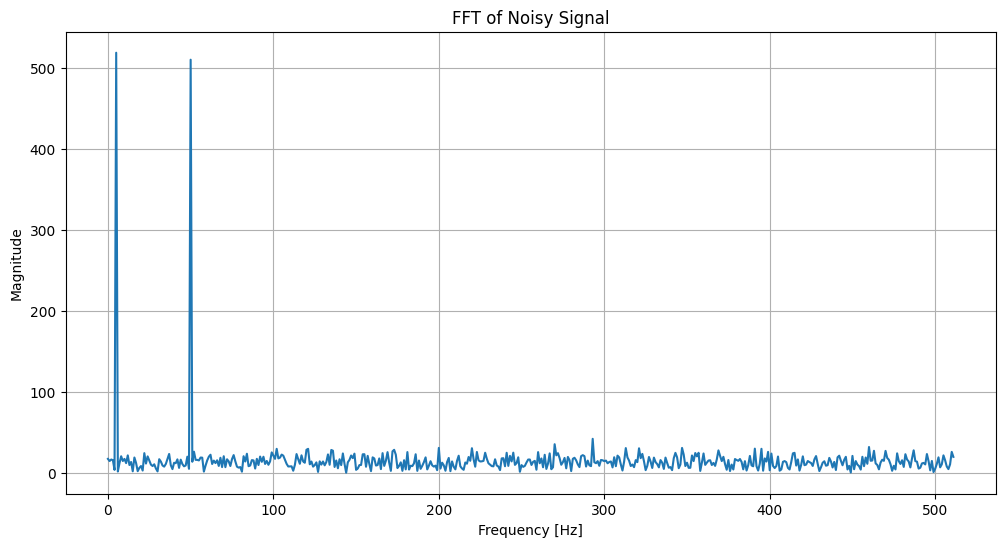

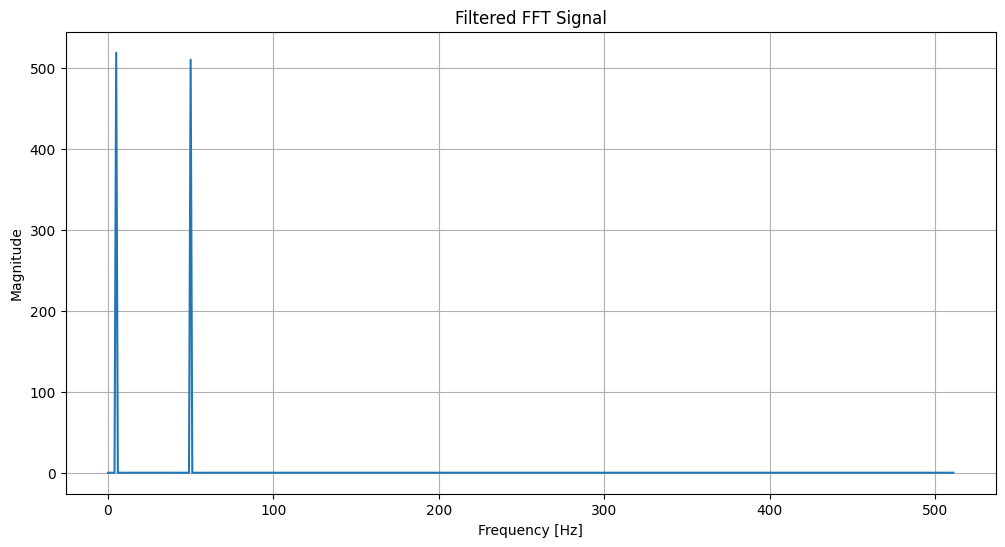

/var/folders/1r/nr0_b6h93gnbrdl1p0899fsh0000gn/T/ipykernel_4572/2243463867.py:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  res[n] += X[k] * np.exp(2j * np.pi * k * n / N)


In [134]:
denoised_signal, noise = algorithm(noisy_signal, 150)

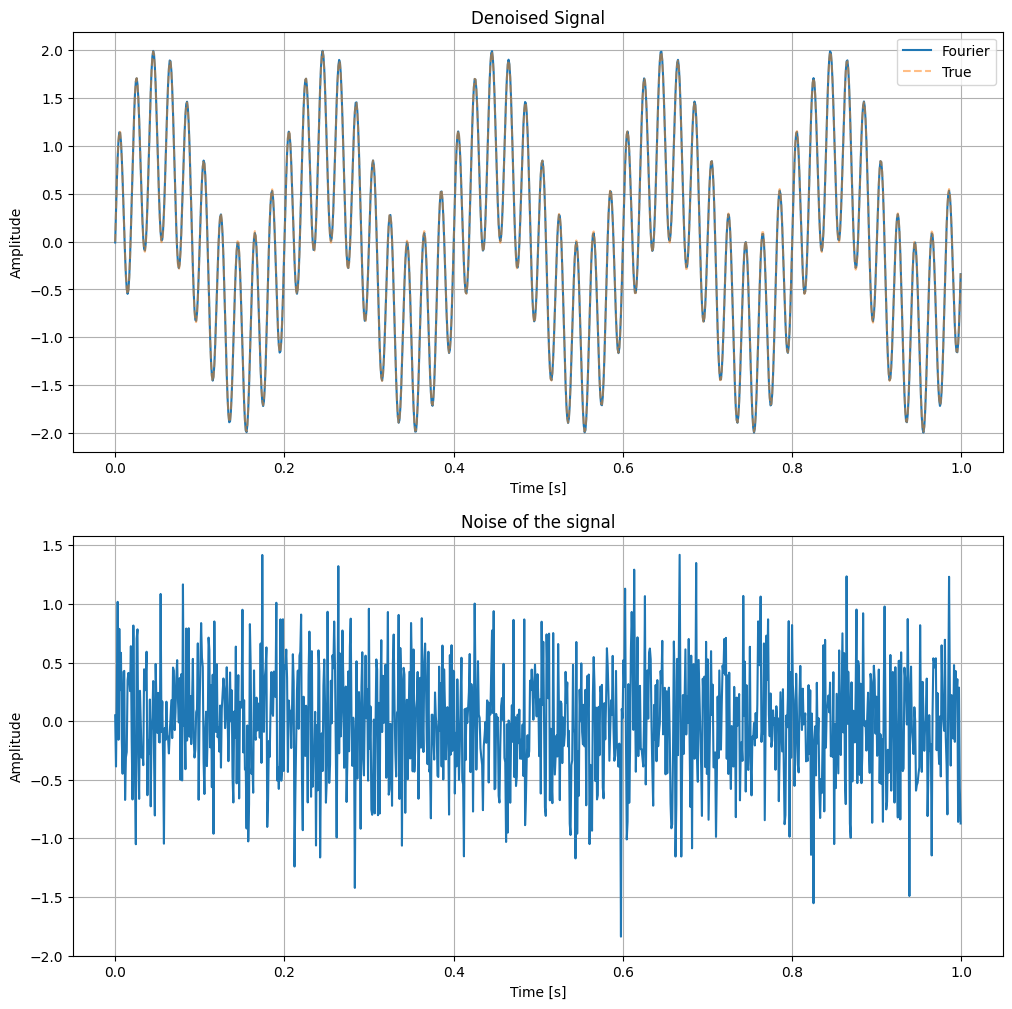

In [135]:

plt.figure(figsize=(12, 12))
plt.subplot(2,1,1)

# Plot the denoised signal
plt.plot(t, denoised_signal, label='Fourier')
plt.plot(t, signal, '--', alpha=0.5, label='True')
plt.title('Denoised Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()

plt.subplot(2,1,2)

# Plot the noise
plt.plot(t, noise)
plt.title('Noise of the signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

# Задание 2